In [12]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [ ]:
Download this page as a jupyter notebook at [Lesson 21](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson21/ENGR-1330-Lesson21.ipynb)

---

---
<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div>

Last GitHub Commit Date: 4 Nov 2021

In [13]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
compthink
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


# Lesson 22 -- Classification Engines

This lesson largely explains the difference between prediction engines and classification engines, and concludes with logistic regression, which sort of bridges the gap between the two concepts.

<!--![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)-->

## Objectives

- Create logistic regression models to classify (binary assignment) output based on multiple continuous inputs
- Create presentation-quality graphs and charts for reporting results
---

## Computational Thinking Concepts

|Description|Computational Thinking Concept|
|:---|:---|
|Logistic Model|Abstraction|
|Response and Explanatory Variables|Decomposition|
|Primitive arrays: vectors and matrices|Data Representation|
|NumPy arrays: vectors and matrices|Data Representation|

---

## Textbook Resources

[https://inferentialthinking.com/chapters/17/Classification.html](https://inferentialthinking.com/chapters/17/Classification.html)

<hr>

## What Brains Do Well

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/pictures.png)

## A Prediction Machine

Imagine a basic machine that takes a question, does some “thinking” and pushes out an answer. Just like the example above with ourselves taking input through our eyes, using our brains to analyse the scene, and coming to the conclusion about what objects are in that scene. Here’s what this looks like: 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/eat-sleep-poop1.png)

Computers don’t really think, they’re just glorified calculators remember, so let’s use more appropriate words to describe what’s going on: 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/eat-sleep-poop2.png)

A computer takes some input, does some calculation and poops out an output. The following illustrates this. An input of “3 x 4” is processed, perhaps by turning multiplication into an easier set of additions, and the output answer “12” poops out.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/three-by-four.png)

Not particularly impressive - we could even write a function!

In [27]:
def threeByfour(a,b):
    value = a * b
    return(value)

a = 3; b=4

print('a times b =',threeByfour(a,b))

a times b = 12


Next, Imagine a machine that converts kilometres to miles, like the following:

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/km-2-miles.png)

But imagine we don’t know the formula for converting between kilometres and miles. All we know is the the relationship between the two is **linear**. That means if we double the number in miles, the same distance in kilometres is also doubled. 

This linear relationship between kilometres and miles gives us a clue about that mysterious calculation ­ it needs to be of the form “miles = kilometres x **c**”, where **c** is a constant. We don’t know what this constant **c** is yet. The only other clues we have are some examples pairing kilometres with the correct value for miles. These are like real world observations used to test scientific theories - they’re examples of real world truth.

|Truth Example|Kilometres|Miles|
|:---|---:|---:|
|1| 0| 0| 
|2| 100| 62.137|

To work out that missing constant **c** just pluck a value at random and give it a try! Let’s try **c** = 0.5 and see what happens.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/first-shot.png)

Here we have miles = kilometres x **c**, where kilometres is 100 and **c** is our current guess at 0.5. That gives 50 miles. Okay. That’s not bad at all given we chose **c** = 0.5 at random! But we know it’s not exactly right because our truth example number 2 tells us the answer should be 62.137. We’re wrong by 12.137. That’s the **error**, the difference between our calculated answer and the actual truth from our list of examples. That is, 

error = truth - calculated = 62.137 - 50 = 12.137



In [1]:
def km2miles(km,c):
    value = km*c
    return(value)

x=100
c=0.5
y=km2miles(x,c)
t=62.137

print(x, 'kilometers is estimated to be ',y,' miles')
print('Estimation error is ', t-y , 'miles')

100 kilometers is estimated to be  50.0  miles
Estimation error is  12.137 miles


![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson23/PsuedoLesson/first-error.png)

So what next? We know we’re wrong, and by how much. Instead of being a reason to despair, we use this error to guide a second, better, guess at **c**. Look at that error again. We were short by 12.137. Because the formula for converting kilometres to miles is linear, miles = kilometres x **c**, we know that increasing **c** will increase the output. Let’s nudge **c** up from 0.5 to 0.6 and see what happens. 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/second-shot.png)

With **c** now set to 0.6, we get miles = kilometres x **c** = 100 x 0.6 = 60. That’s better than the previous answer of 50. We’re clearly making progress! Now the error is a much smaller 2.137. It might even be an error we’re happy to live with.

In [30]:
def km2miles(km,c):
    value = km*c
    return(value)

x=100
c=0.6
y=km2miles(x,c)
t=62.137

print(x, 'kilometers is estimated to be ',y,' miles')
print('Estimation error is ', t-y , 'miles')

100 kilometers is estimated to be  60.0  miles
Estimation error is  2.1370000000000005 miles


The important point here is that we used the error to guide how we nudged the value of c. We wanted to increase the output from 50 so we increased **c** a little bit. Rather than try to use algebra to work out the exact amount **c** needs to change, let’s continue with this approach of refining **c**. If you’re not convinced, and think it’s easy enough to work out the exact answer, remember that many more interesting problems won’t have simple mathematical formulae relating the output and input. That’s why we use more sophisticated "machine learning" methods. Let’s do this again. The output of 60 is still too small. Let’s nudge the value of **c** up again from 0.6 to 0.7.

Rashid, Tariq. Make Your Own Neural Network (Page 16).  . Kindle Edition. 

In [31]:
def km2miles(km,c):
    value = km*c
    return(value)

x=100
c=0.7
y=km2miles(x,c)
t=62.137

print(x, 'kilometers is estimated to be ',y,' miles')
print('Estimation error is ', t-y , 'miles')

100 kilometers is estimated to be  70.0  miles
Estimation error is  -7.8629999999999995 miles


![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/overshoot.png)

Oh no! We’ve gone too far and **overshot** the known correct answer. Our previous error was 2.137 but now it’s -7.863. The minus sign simply says we overshot rather than undershot, remember the error is (correct value - calculated value). Ok so **c** = 0.6 was way better than c = 0.7. We could be happy with the small error from **c** = 0.6 and end this exercise now. But let’s go on for just a bit longer. 

Let's split the difference from our last guess - we still have overshot, but not as much (-2.8629).  
Split again to **c**=0.625, and overshoot is only (-0.3629) (we could sucessively split the **c** values until we are close enough. The method just illustrated is called bisection, and the important point is that we avoided any mathematics other than bigger/smaller and multiplication and subtraction; hence just arithmetic.)

That’s much much better than before. We have an output value of 62.5 which is only wrong by 0.3629 from the correct 62.137. So that last effort taught us that we should moderate how much we nudge the value of **c**. If the outputs are getting close to the correct answer - that is, the error is getting smaller - then don’t nudge the constant so much. That way we avoid overshooting the right value, like we did earlier. Again without getting too distracted by exact ways of working out **c**, and to remain focussed on this idea of successively refining it, we could suggest that the correction is a fraction of the error. That’s intuitively right - a big error means a bigger correction is needed, and a tiny error means we need the teeniest of nudges to **c**. What we’ve just done, believe it or not, is walked through the very core process of learning in a neural network - we’ve trained the machine to get better and better at giving the right answer. It is worth pausing to reflect on that - we’ve not solved a problem exactly in one step. Instead, we’ve taken a very different approach by trying an answer and improving it repeatedly. Some use the term **iterative** and it means repeatedly improving an answer bit by bit.


In [32]:
def km2miles(km,c):
    value = km*c
    return(value)

x=100
c=0.65
y=km2miles(x,c)
t=62.137

print(x, 'kilometers is estimated to be ',y,' miles')
print('Estimation error is ', t-y , 'miles')

100 kilometers is estimated to be  65.0  miles
Estimation error is  -2.8629999999999995 miles


In [35]:
def km2miles(km,c):
    value = km*c
    return(value)

x=100
c=0.625
y=km2miles(x,c)
t=62.137

print(x, 'kilometers is estimated to be ',y,' miles')
print('Estimation error is ', t-y , 'miles')

100 kilometers is estimated to be  62.5  miles
Estimation error is  -0.36299999999999955 miles


## Classification

We called the above simple machine a **predictor**, because it takes an input and makes a prediction of what the output should be. We refined that prediction by adjusting an internal parameter, informed by the error we saw when comparing with a known-true example.

Now look at the following graph showing the measured widths and lengths of garden bugs. 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/ladybugs.png)

You can clearly see two groups. The caterpillars are thin and long, and the ladybirds are wide and short. Remember the predictor that tried to work out the correct number of miles given kilometres? That predictor had an adjustable linear function at it’s heart. Remember, linear functions give straight lines when you plot their output against input. The adjustable parameter **c** changed the slope of that straight line.

Rashid, Tariq. Make Your Own Neural Network (Page 19).  . Kindle Edition. 

/opt/jupyterhub/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/opt/jupyterhub/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


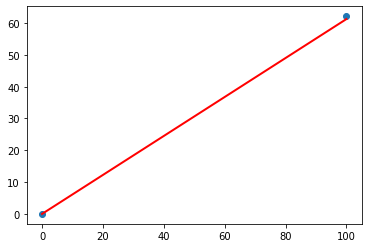

In [2]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
# plot the predictor machine here
kilometers = [0, 100]
miles = [0,62.137]
x = np.array(kilometers)
Y = np.array(miles)

#We already know these parameters from last week but let's assume that we don't!
# alpha = -16.78636363636364
# beta = 11.977272727272727
#Our linear model: ypred = alpha + beta * x

import statsmodels.api as sm     #needed for linear regression
from statsmodels.sandbox.regression.predstd import wls_prediction_std   #needed to get prediction interval
X = sm.add_constant(x)
re = sm.OLS(Y, X).fit()
#print(re.summary())
#print(re.params)
prstd, iv_l, iv_u = wls_prediction_std(re) #iv_l and iv_u give you the limits of the prediction interval for each point.
#print(iv_l)
#print(iv_u)
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

c = 0.6125
yyyy = km2miles(x,c)

plt.plot(x, Y, 'o')
plt.plot(x, yyyy , '-',color='red', lw=2)
#plt.plot(x, predict_ci_low, '--', color='green',lw=2) #Lower prediction band
#plt.plot(x, predict_ci_upp, '--', color='green',lw=2) #Upper prediction band
#plt.plot(x, predict_mean_ci_low,'--', color='orange',  lw=2) #Lower confidence band
#plt.plot(x, predict_mean_ci_upp,'--', color='orange', lw=2) #Upper confidence band
plt.show()

What happens if we place a straight line over that plot? 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/bugslope1.png)

We can’t use the line in the same way we did before - to convert one number (kilometres) into another (miles), but perhaps we can use the line to separate different kinds of things. In the plot above, if the line was dividing the caterpillars from the ladybirds, then it could be used to **classify** an unknown bug based on its measurements. The line above doesn’t do this yet because half the caterpillars are on the same side of the dividing line as the ladybirds. Let’s try a different line, by adjusting the slope again, and see what happens.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/bugslope2.png)

This time the line is even less useful! It doesn’t separate the two kinds of bugs at all. Let’s have another go:

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/bugslope3.png)

That’s much better! This line neatly separates caterpillars from ladybirds. We can now use this line as a **classifier** of bugs. We are assuming that there are no other kinds of bugs that we haven’t seen - but that’s ok for now, we’re simply trying to illustrate the idea of a simple classifier. Imagine next time our computer used a robot arm to pick up a new bug and measured its width and height, it could then use the above line to classify it correctly as a caterpillar or a ladybird. Look at the following plot, you can see the unknown bug is a caterpillar because it lies above the line. This classification is simple but pretty powerful already!

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/newbug.png)

We’ve seen how a linear function inside our simple predictors can be used to classify previously unseen data. But we’ve skipped over a crucial element. How do we get the right slope? How do we improve a line we know isn’t a good divider between the two kinds of bugs? The answer to that is again at the very heart of how machines learn, and we’ll look at this next.

### Training A Simple Classifier

We want to **train** our linear classifier to correctly classify bugs as ladybirds or caterpillars. We saw above this is simply about refining the slope of the dividing line that separates the two groups of points on a plot of big width and height.

How do we do this? We need some examples to learn from. The following table shows two examples, just to keep this exercise simple. 

|Example| Width| Length| Bug |
|:---|:---|:---|:---|
|1 | 3.0 | 1.0 | ladybird |
|2 | 1.0 | 3.0 | caterpillar |

We have an example of a bug which has width 3.0 and length 1.0, which we know is a ladybird. We also have an example of a bug which is longer at 3.0 and thinner at 1.0, which is a caterpillar. This is a set of examples which we declare to be the truth. 

It is these examples which will help refine the slope of the classifier function. Examples of truth used to teach a predictor or a classifier are called the **training data.**
Let’s plot these two training data examples. Visualising data is often very helpful to get a better understand of it, a feel for it, which isn’t easy to get just by looking at a list or table of numbers.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/trainingbugs.png)

Let’s start with a random dividing line, just to get started somewhere. Looking back at our miles to kilometre predictor, we had a linear function whose parameter we adjusted. We can do the same here, because the dividing line is a straight line: $y = Ax+b$ 

We’ve deliberately used the names $y$ and $x$ instead of length and width, because strictly speaking, the line is not a predictor here. It doesn’t convert width to length, like we previously converted miles to kilometres. Instead, it is a dividing line, a classifier. To keep the garden bug scenario as simple as possible we will choose a zero intercept $b=0$. 

We saw before that the parameter $A$ controls the slope of the line. The larger $A$ is the larger the slope. Let’s go for $A$ is 0.25 to get started. The dividing line is $y = 0.25x$. Let’s plot this line on the same plot of training data to see what it looks like: 

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/classyline1.png)

Well, we can see that the line $y = 0.25x$ isn’t a good classifier already without the need to do any calculations. The line doesn’t divide the two types of bug - We can’t say “if the bug is above the line then it is a caterpillar” because the ladybird is above the line too.

So intuitively we need to move the line up a bit. We’ll resist the temptation to do this by looking at the plot and drawing a suitable line. We want to see if we can find a repeatable recipe to do this, a series of computer instructions, which computer scientists call an **algorithm**. 

Let’s look at the first training example: the width is 3.0 and length is 1.0 for a ladybird. 
If we tested the $y = Ax$ function with this example where $x$ is 3.0, we’d get $y = (0.25) * (3.0) = 0.75$ 
The function, with the parameter $A$ set to the initial arbitrary chosen value of 0.25, is suggesting that for a bug of width 3.0, the length should be 0.75. 
We know that’s too small because the training data example tells us it must be a length of 1.0. So we have a difference, an **error**. 
Just as before, with the miles to kilometres predictor, we can use this error to inform how we adjust the parameter $A$. But let’s think about what $y$ should be again. 
If $y$ was 1.0 then the line goes right through the point where the ladybird sits at $(x,y) = (3.0, 1.0)$. 
It’s a subtle point but we don’t actually want that. 
We want the line to go above that point. 
Why? Because we want all the ladybird points to be below the line, not on it. 
The line needs to be a *dividing line* between ladybirds and caterpillars, not a predictor of a bug’s length given its width. 
So let’s try to aim for $y = 1.1$ when $x = 3.0$. 
It’s just a small number above 1.0, We could have chosen 1.2, or even 1.3, but we don’t want a larger number like 10 or 100 because that would make it more likely that the line goes above both ladybirds and caterpillars, resulting in a separator that wasn’t useful at all. So the desired target is 1.1, and the error **E** is 

    error = (desired target - actual output)

Which is, $E = 1.1 - 0.75 = 0.35$ 

Let’s examine the error, the desired target and the calculated value visually.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/visualbugs.png)

Now, what do we do with this **E** to guide us to a better refined parameter $A$? 

We want to use the error in $y$, which we call **E**, to inform the required change in parameter $A$. 
To do this we need to know how the two are related. How is $A$ related to **E**?

If we know this, then we can understand how changing one affects the other (correlation anyone?). 

Let’s start with the linear function for the classifier: $y = Ax$ 
We know that for initial guesses of $A$ this gives the wrong answer for $y$, which should be the value given by the training data. 
Let’s call the correct desired value, $t$ for target value. To get that value $t$, we need to adjust $A$ by a small amount; $ t = (A + \Delta A)x$ Let’s picture this to make it easier to understand. You can see the new slope $(A + \Delta A)$.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/deltaA.png)

Remember the error **E** was the difference between the desired correct value and the one we calculate based on our current guess for $A$. That is, **E** was $t - y$ (Kind of smells like a residual!);

$$ t - y = (A + \Delta A)x - Ax$$

Expanding out the terms and simplifying: 

$$ \textbf{E} = t - y = (Ax + \Delta A)x - Ax =  E = (\Delta A)x $$

That’s remarkable! The error **E** is related to $\Delta A$ in a very simple way. 

We wanted to know how much to adjust $A$ by to improve the slope of the line so it is a better classifier, being informed by the error **E**. 
To do this we simply re-arrange that last equation: $\Delta A = \textbf{E}/ x$
That’s the magic expression we’ve been looking for. We can use the error **E** to refine the slope $A$ of the classifying line by an amount  $\Delta A$. 

Let’s update that initial slope. The error was 0.35 and the $x$ was 3.0. 
That gives $\Delta A = \textbf{E}/ x$ as 0.35/ 3.0 = 0.1167. 
That means we need to change the current $A = 0.25$ by $0.1167$. 
That means the new improved value for $A$ is (A​ + ΔA​) which is 0.25 + 0.1167 = 0.3667. As it happens, the calculated value of $y$ with this new $A$ is 1.1 as you’d expect - it’s the desired target value. 

Now we have a method for refining that parameter $A$, informed by the current error. Now we’re done with one training example, let’s learn from the next one. Here we have a known true pairing of $x$ = 1.0 and $y$ = 3.0. Let’s see what happens when we put $x$ = 1.0 into the linear function which is now using the updated $A$ = 0.3667. We get $y$ = 0.3667 * 1.0 = 0.3667. 
That’s not very close to the training example with $y$ = 3.0 at all. 

Using the same reasoning as before that we want the line to not cross the training data but instead be just above or below it, we can set the desired target value at 2.9. This way the training example of a caterpillar is just above the line, not on it. The error E​ is (2.9 ­ 0.3667) = 2.5333. That’s a bigger error than before, but if you think about it, all we’ve had so far for the linear function to learn from is a single training example, which clearly biases the line towards that single example. 

Let’s update the $A$ again, just like we did before. The $\Delta A$ is $\textbf{E}/x$ which is 2.5333/ 1.0 = 2.5333. That means the even newer $A$ is 0.3667 + 2.5333 = 2.9. That means for $x = 1.0$ the function gives 2.9 as the answer, which is what the desired value was.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/someupdates.png)

The  plot shows the initial line, the line updated after learning from the first training example, and the final line after learning from the second training example. 

Looking at that plot, we don’t seem to have improved the slope in the way we had hoped. It hasn’t divided neatly the region between ladybirds and caterpillars. 
The line updates to give each desired value for y. 
If we keep doing this, updating for each training data example, all we get is that the final update simply matches the last training example closely. We might as well have not bothered with all previous training examples. In effect we are throwing away any learning that previous training examples might gives us and just learning from the last one. How do we fix this?

Easy! And this is an important idea in machine learning.**We moderate** the updates. That is, we calm them down a bit. Instead of jumping enthusiastically to each new $A$, we take a fraction of the change $\Delta A$, not all of it. This way we move in the direction that the training example suggests, but do so slightly cautiously, keeping some of the previous value which was arrived at through potentially many previous training iterations. We saw this idea of moderating our refinements before - with the simpler miles to kilometres predictor, where we nudged the parameter **c** as a fraction of the actual error. 

This moderation, has another very powerful and useful side effect. When the training data itself can’t be trusted to be perfectly true, and contains errors or noise, both of which are normal in real world measurements, the moderation can dampen the impact of those errors or noise. It smooths them out. Ok let’s rerun that again, but this time we’ll add a moderation into the update formula: $\Delta A = L (E/ x)$

The moderating factor is often called a **learning rate**, and we’ve called it $L$. Let’s pick $L$ = 0.5 as a reasonable fraction just to get started. It simply means we only update half as much as would have done without moderation. 

Running through that all again, we have an initial $A$ = 0.25. The first training example gives us y = 0.25 * 3.0 = 0.75. A desired value of 1.1 gives us an error of 0.35. The $\Delta A = L (E/ x)$ = 0.5 * 0.35/ 3.0 = 0.0583. The updated $A$ is 0.25 + 0.0583 = 0.3083. 

Trying out this new A on the training example at $x$ = 3.0 gives y​ = 0.3083 * 3.0 = 0.9250. The line now falls on the wrong side of the training example because it is below 1.1 but it’s not a bad result if you consider it a first refinement step of many to come. It did move in the right direction away from the initial line. 

Let’s press on to the second training data example at $x$ = 1.0. Using $A$ = 0.3083 we have y = 0.3083 * 1.0 = 0.3083. The desired value was 2.9 so the error is (2.9 * 0.3083) = 2.5917. The $\Delta A = L (E/ x)$ = 0.5 * 2.5917/ 1.0 = 1.2958. The even newer $A$ is now 0.3083 + 1.2958 = 1.6042. Let’s visualise again the initial, improved and final line to see if moderating updates leads to a better dividing line between ladybird and caterpillar regions.

![](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson22-New/moderatedUpdates.png)

This is really good! Even with these two simple training examples, and a relatively simple update method using a moderating **learning rate**, we have very rapidly arrived at a good dividing line $y = Ax$ where $A$ is 1.6042. Let’s not diminish what we’ve achieved. We’ve achieved an automated method of learning to classify from examples that is remarkably effective given the simplicity of the approach.

<!--### Multiple Classifiers (future revisions)

### Neuron Analog (future revisions)
- threshold
- step-function
- logistic function
- computational linear algebra

## Classifiers in Python (future revisions)
- KNN Nearest Neighbor (use concrete database as example, solids as homework)
- ANN Artifical Neural Network (use minst database as example, something from tensorflow as homework)
- Clustering(K means, heriarchial (random forests))
- SVM 
- PCA (? how is this machine learning we did this in the 1970s?)-->


## Logistic Regression - A step towards classification

From Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression) (emphasis is mine):

In statistics, the **logistic model** (or logit model) is used to model the probability of a certain **class** or **event** existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a **statistical model** that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a **binary logistic model** has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the **logistic model**, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). 

The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In a binary logistic regression model, the dependent variable has two levels (categorical). Outputs with more than two values are modeled by multinomial logistic regression and, if the multiple categories are ordered, by ordinal logistic regression (for example the proportional odds ordinal logistic model). The logistic regression model itself simply **models probability of output** in terms of input and does not perform statistical classification (it is not a classifier), though it can be used to make a classifier, for instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other; this is a common way to make a binary classifier. The coefficients are generally not computed by a closed-form expression, unlike linear least squares; see § Model fitting. $\dots$

Now lets visit the Wiki and learn more https://en.wikipedia.org/wiki/Logistic_regression

Now lets visit our friends at towardsdatascience https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc  Here we will literally CCMR the scripts there.

We need the data,  a little searching and its here https://gist.github.com/curran/a08a1080b88344b0c8a7 after download and extract we will need to rename the database

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('iris-data.csv')

In [6]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [10]:
#Plot
import warnings
warnings.filterwarnings('ignore')

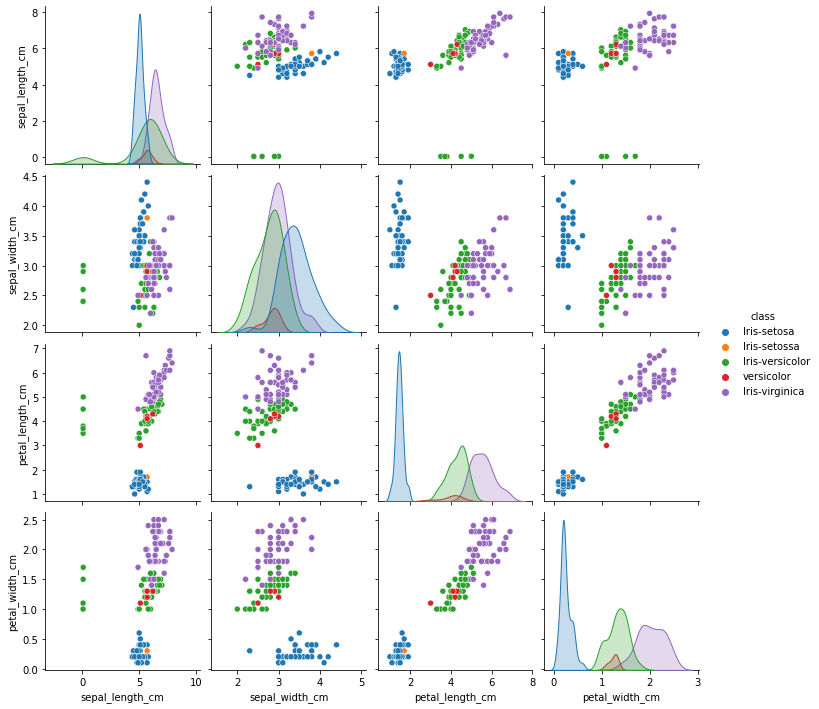

In [11]:
sns.pairplot(df, hue='class', height=2.5)

From the plots it can be observed that there is some abnormality in the class name. Let's explore further

In [12]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from the above results
- For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
- For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

In [13]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

# Simple Logistic Regression

Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [14]:
final_df = df[df['class'] != 'Iris-virginica']

In [15]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Outlier Check

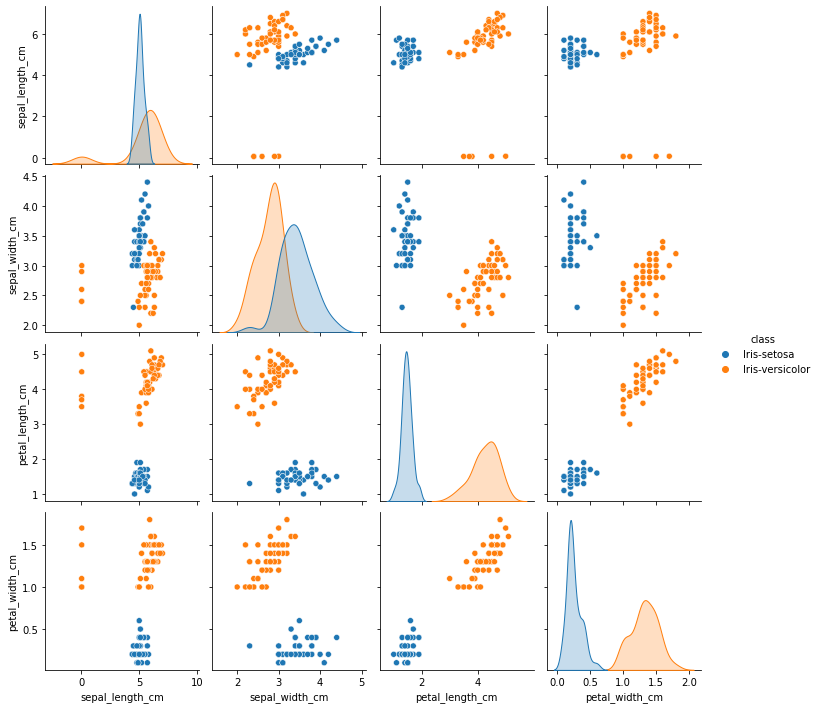

In [16]:
sns.pairplot(final_df, hue='class', height=2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

SEPAL LENGTH

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

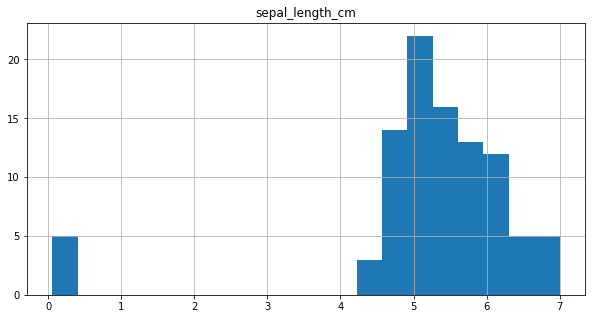

In [17]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

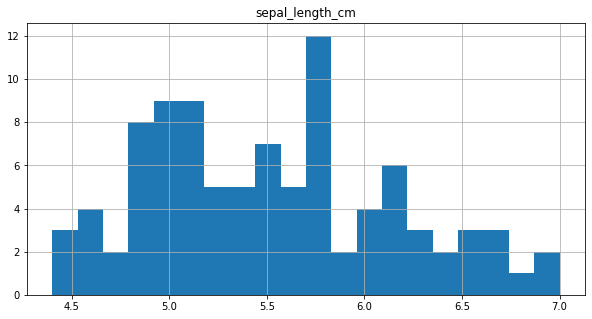

In [18]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

SEPAL WIDTH

In [19]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

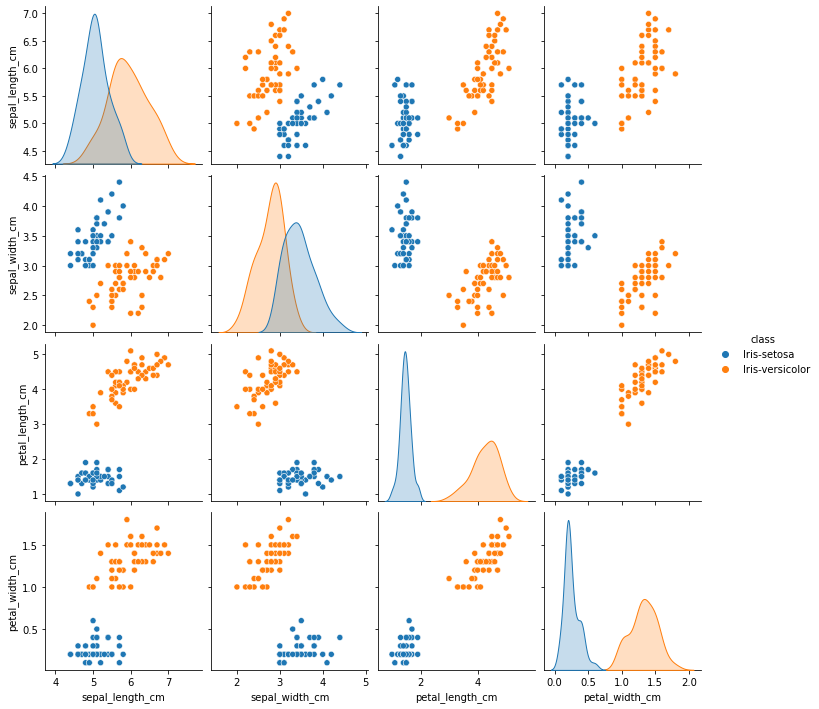

In [20]:
sns.pairplot(final_df, hue='class', height=2.5)

Successfully removed outliers!!

# Label Encoding

In [21]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [22]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [45]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [47]:
X_tr_arr = X_train
X_ts_arr = X_test
#y_tr_arr = y_train.as_matrix()  method deprecated as per https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.DataFrame.as_matrix.html
#y_ts_arr = y_test.as_matrix()
y_tr_arr = y_train.to_numpy()  # method deprecated as per https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.DataFrame.as_matrix.html
y_ts_arr = y_test.to_numpy()
#y_tr_arr = y_train # pick up syntax by follow X_train; or could read, but a guess is faster
#y_ts_arr = y_test

In [48]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (75, 4)
Output Shape (19, 4)


In [49]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [50]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [51]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [52]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [53]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [100]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=600000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[-0.91636704  1.5733437  -1.79373011 -1.85972563]]
Optimized intercept -0.44772456524411347
Training Accuracy 1.0
Test Accuracy 1.0


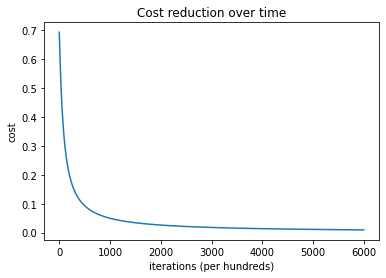

In [101]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [102]:
final_df.iloc[93]

sepal_length_cm    5.7
sepal_width_cm     2.8
petal_length_cm    4.1
petal_width_cm     1.3
class              0.0
Name: 99, dtype: float64

In [103]:
# how to access the model
def mymodel(x1,x2,x3,x4,w1,w2,w3,w4,b):
    z = w1*x1 + w2*x2 +b #linear model to produce estimator to send to logistic fn
    yhat = sigmoid_activation(z)
    return(yhat)
# some inputs
sepal_l = 5.5
sepal_w = 2.5
petal_l = 4.0
petal_w = 1.3
myguess = mymodel(sepal_l,sepal_w,petal_l,petal_w,w[0,0],w[0,1],w[0,2],w[0,3],b)
print(myguess)

0.17445398337777282


In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
clf = LogisticRegression()

In [106]:
clf.fit(X_tr_arr, y_tr_arr)

LogisticRegression()

In [107]:
print (clf.intercept_, clf.coef_)

[-0.55607279] [[-0.69791666  1.16455265 -1.40231641 -1.47095115]]


In [108]:
pred = clf.predict(X_ts_arr)

In [109]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0


In [110]:
# using sklearn
# some inputs
sepal_l = 5.5
sepal_w = 2.5
petal_l = 4.0
petal_w = 1.3
myguess = mymodel(sepal_l,sepal_w,petal_l,petal_w,clf.coef_[0,0],clf.coef_[0,1],clf.coef_[0,2],clf.coef_[0,3],clf.intercept_[0])
print(myguess)

0.18493961618793053


## References

Rashid, Tariq. Make Your Own Neural Network.  . Kindle Edition. 